In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
from sklearn import model_selection
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.NaN)
#count the number of NaN values in each column
print(df.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [5]:
#Imputing mean to missing values
df = df.fillna(df.mean())

In [6]:
#replacing values 0 to 17 with 0,1
df['Pregnancies']=df['Pregnancies'].replace(to_replace =[2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17], value =1) 

In [7]:
y = df['Outcome']
x = df.drop(['Outcome'], axis=1)
x.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.855469,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885
std,0.351857,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000
50%,1.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000
75%,1.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000
max,1.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [8]:
#z-score normalization
z=scipy.stats.zscore(x)
z=pd.DataFrame(z)

In [9]:
#Applying PCA
pca = PCA(n_components=.95)

In [10]:
pca.fit(z)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
x_pca = pca.transform(z)
x_pca

array([[ 1.21981462, -0.89761057,  0.01387234, ...,  0.84625235,
        -0.42531572, -0.03064998],
       [-1.29197669, -0.16604779, -0.14269062, ...,  0.24929108,
         0.77600039,  0.34049033],
       [ 0.07096664, -0.91401219,  1.58411704, ...,  0.2608256 ,
        -1.52298366,  1.0519063 ],
       ...,
       [-1.18117893, -0.6522705 , -0.18782097, ..., -0.26312198,
        -0.39308293,  0.26186619],
       [-0.23401762, -0.95381091,  0.18846128, ...,  1.19185795,
        -0.17068044, -0.39501998],
       [-0.91338629,  0.36701623, -0.28430998, ..., -0.37583457,
         0.50858089,  0.39535421]])

Text(0,0.5,'Second Principal Component')

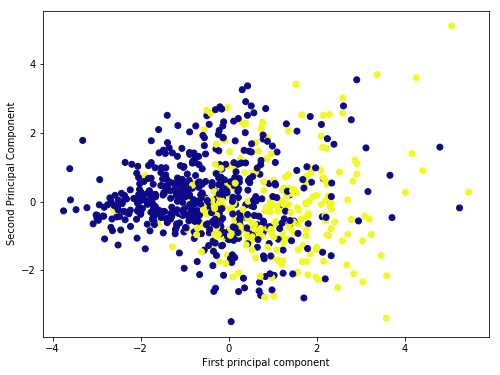

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=df['Outcome'],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [13]:
#Applying k-means
kmeans = KMeans(n_clusters=2,random_state=42)
kmeans.fit(x_pca)
y_kmeans = kmeans.predict(x_pca)

In [14]:
centroids = kmeans.cluster_centers_
print(centroids)

[[-0.99150568  0.22320907  0.07110226  0.00667533 -0.07542139 -0.0301499
   0.05837401  0.04320288]
 [ 1.30902714 -0.29468992 -0.09387216 -0.00881305  0.09957446  0.03980516
  -0.0770678  -0.05703824]]


In [15]:
cluster_result = pd.DataFrame()
#The cluster result and the actual result
cluster_result['cluster'] = y_kmeans
cluster_result['Actual'] = y
cluster_result.head(10)

,cluster,Actual
0,1,1
1,0,0
2,1,1
3,0,0
4,1,1
5,0,0
6,0,1
7,0,0
8,1,1
9,1,1


In [16]:
cluster_result['cluster'].value_counts()

0    437
1    331
Name: cluster, dtype: int64

In [17]:
x['Outcome']=y_kmeans

In [18]:
#Extracting the correctly classified data
df['OutcomeMatch'] = np.where(df.Outcome == x.Outcome, 'True', 'False')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,OutcomeMatch
0,1,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50,1,True
1,1,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31,0,True
2,1,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32,1,True
3,1,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21,0,True
4,0,137.0,40.000000,35.00000,168.000000,43.100000,2.288,33,1,True
5,1,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30,0,True
6,1,78.0,50.000000,32.00000,88.000000,31.000000,0.248,26,1,False
7,1,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29,0,True
8,1,197.0,70.000000,45.00000,543.000000,30.500000,0.158,53,1,True
9,1,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54,1,True


In [19]:
df.drop(df[df['OutcomeMatch'] == "False"].index, inplace = True)

In [20]:
df=df.drop(['OutcomeMatch'],axis=1)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50,1
1,1,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31,0
2,1,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32,1
3,1,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21,0
4,0,137.0,40.000000,35.00000,168.000000,43.100000,2.288,33,1
5,1,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30,0
7,1,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29,0
8,1,197.0,70.000000,45.00000,543.000000,30.500000,0.158,53,1
9,1,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54,1
11,1,168.0,74.000000,29.15342,155.548223,38.000000,0.537,34,1


In [21]:
x = df.drop('Outcome',axis=1)
y = df['Outcome']

In [22]:
#Logistic Regression k-fold cross validation
kfold = model_selection.KFold(n_splits=10)
model = LogisticRegression()

y_pred = cross_val_predict(model, x, y, cv=10)
conf_mat = confusion_matrix(y, y_pred)
results = model_selection.cross_val_score(model, x, y, cv=10)
print("Accuracy: %.3f%%" % (results.mean()*100.0))
conf_mat

Accuracy: 93.616%


array([[347,  11],
       [ 24, 165]], dtype=int64)